In [1]:
%matplotlib inline

from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
@dataclass
class Results:
    name: str
    N: np.ndarray
    mem_usage: np.ndarray
    mflops: np.ndarray

In [10]:
# read data
# results_dir='results/'
ths = [1,2,4,8,16]
type = "mkn_omp"

cache_levels = [ # in kB
    20_000, # L1 
    256_000,# L2 
    300_000 # L3
    ]

results_dict:Dict[str,Results] = dict()
# NOTE: format;= N mem_usage MFlops/s
for th in ths:
    th_data = np.loadtxt(f"./{type}/{type}_{th}.txt")
    results_dict[th] = Results(
        name = th,
        N=th_data[:,0],
        mem_usage=th_data[:,1],
        mflops=th_data[:,2]
    )

In [11]:
# results_dict

{1: Results(name=1, N=array([ 100.,  200.,  500., 1000., 2000.]), mem_usage=array([  234.375,   937.5  ,  5859.375, 23437.5  , 93750.   ]), mflops=array([ 8290.257, 11649.521, 13151.425, 15181.136,  8076.343])),
 2: Results(name=2, N=array([ 100.,  200.,  500., 1000., 2000.]), mem_usage=array([  234.375,   937.5  ,  5859.375, 23437.5  , 93750.   ]), mflops=array([11738.17 , 18998.239, 21299.845, 23861.399, 16944.407])),
 4: Results(name=4, N=array([ 100.,  200.,  500., 1000., 2000.]), mem_usage=array([  234.375,   937.5  ,  5859.375, 23437.5  , 93750.   ]), mflops=array([12396.619, 24527.301, 32954.005, 42824.504, 31365.634])),
 8: Results(name=8, N=array([ 100.,  200.,  500., 1000., 2000.]), mem_usage=array([  234.375,   937.5  ,  5859.375, 23437.5  , 93750.   ]), mflops=array([ 8121.051, 18322.565, 31942.474, 53061.446, 59261.843])),
 16: Results(name=16, N=array([ 100.,  200.,  500., 1000., 2000.]), mem_usage=array([  234.375,   937.5  ,  5859.375, 23437.5  , 93750.   ]), mflops=arr

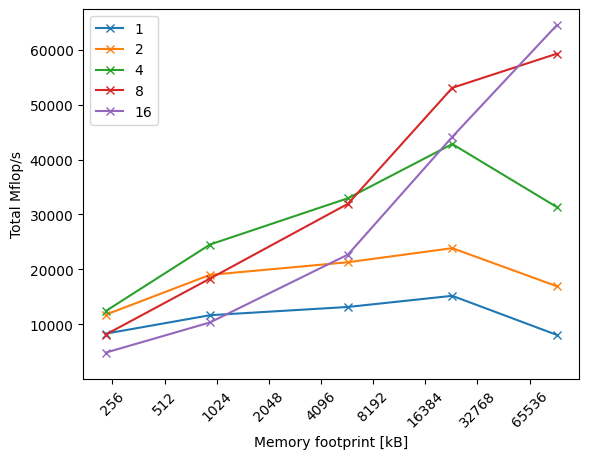

In [12]:
plt.figure()

for th, res in results_dict.items():
    plt.plot(res.mem_usage, res.mflops,"-x",label=res.name)

plt.legend()

# log scale for X axis
plt.xscale('log', base=2)
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())
plt.locator_params(axis='x', numticks=13)

# for cache_level in cache_levels:
#     plt.axvline(cache_level, color='k', linestyle='--')

# make the ticks on an angle
plt.xticks(rotation=45)

plt.xlabel('Memory footprint [kB]')
plt.ylabel('Total Mflop/s')

# set y-axis lower limit to 0
plt.ylim(bottom=100)

# plt.savefig("benchmark")
plt.show()





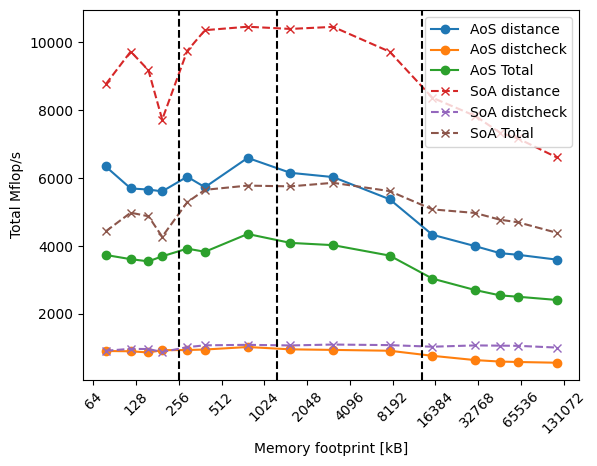

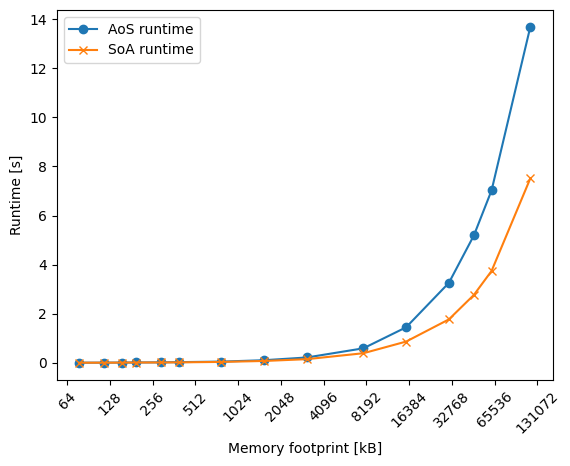

In [34]:
# read data
result_files = "results_short.txt"
data = np.loadtxt(result_files)

# File format: m n k mem_usage MFlops/s diff
M = data[:,0]
N = data[:,1]
K = data[:,2]
mem_usage = data[:,3]
mflops = data[:,4]

# plot data
plt.figure()
plt.plot(data[:,0], data[:,1], 'o-', label='AoS distance')
plt.plot(data[:,0], data[:,2], 'o-', label='AoS distcheck')
plt.plot(data[:,0], data[:,3], 'o-', label='AoS Total')

plt.plot(data[:,0], data[:,1], 'x--', label='SoA distance')
plt.plot(data[:,0], data[:,2], 'x--', label='SoA distcheck')
plt.plot(data[:,0], data[:,3], 'x--', label='SoA Total')
plt.legend()

plt.xscale('log', base=2)
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())
plt.locator_params(axis='x', numticks=13)
# make the ticks on an angle
plt.xticks(rotation=45)

plt.xlabel('Memory footprint [kB]')

plt.ylabel('Total Mflop/s')

cache_levels = [ # in kB
    32, # L1 
    256,# L2 
    25_600 # L3
    ]

for cache_level in cache_levels:
    plt.axvline(cache_level, color='k', linestyle='--')

plt.show()

plt.figure()
plt.plot(data[:,0], data[:,4], 'o-', label='AoS runtime')
plt.plot(data[:,0], data[:,4], 'x-', label='SoA runtime')
plt.legend()

plt.xscale('log', base=2)
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())
plt.locator_params(axis='x', numticks=13)
plt.xticks(rotation=45)

plt.xlabel('Memory footprint [kB]')
plt.ylabel('Runtime [s]')
plt.show()